In [1]:
# Pileup insulation boundaries
# Shown strong boundaries pileup as an example

In [ ]:
%matplotlib inline
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn-white')
import multiprocess as mp
import numpy as np
import pandas as pd
import cooltools
import cooler
import bbi
import bioframe

In [2]:
path=cooler_path
out=output_path

In [5]:
filename1="U54-HFFc6-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename2="U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename3="U54-HFFc6-FA-DSG-MNase-R1-R3_hg38.mapq_30.1000.mcool"


In [16]:
filename1="U54-ESC4DN-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename2="U54-ESC4DN-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool"
filename3="U54-H1ESC4DN-FA-DSG-MNase-R1-R2_hg38.mapq_30.1000.mcool"




In [6]:
exp_path=expected_path
insulation_path=insulation_path

hg38 = bioframe.fetch_chromsizes('hg38')
chromsizes = bioframe.fetch_chromsizes('hg38')
chromosomes = list(chromsizes.index)

print(filename1,filename2,filename3)

conditions = ['FA_DpnII','DSG_DpnII','DSG_MNase']


cool = [filename1,filename2,filename3]


cooler_paths = {

    'FA_DpnII' : path+filename1+'::/resolutions/10000',
    'DSG_DpnII' : path+filename2+'::/resolutions/10000',
    'DSG_MNase' : path+filename3+'::/resolutions/10000',
    
}


long_names = {
    'DSG_MNase': 'DSG_MNase',
    'FA_DpnII': 'FA_DpnII',
    'DSG_DpnII': 'DSG_DpnII',
}

exp_name_list=[file.split(".")[0]+"_10000.cis.expected" for file in cool]   


expected_path={

    'FA_DpnII' : exp_path+exp_name_list[0],
    'DSG_DpnII' : exp_path+exp_name_list[1],
    'DSG_MNase' : exp_path+exp_name_list[2],
}

ins_name_list=[file.split(".")[0]+".txt" for file in cool]   

insulation_path={
    'FA_DpnII' : insulation_path+ins_name_list[0],
    'DSG_DpnII' : insulation_path+ins_name_list[1],
    'DSG_MNase' : insulation_path+ins_name_list[2]
}


clrs = {
    cond: cooler.Cooler(cooler_paths[cond]) for cond in conditions
}




U54-HFFc6-FA-DpnII-R1-R2_hg38.mapq_30.1000.mcool U54-HFFc6-DSG-DpnII-R1-R2_hg38.mapq_30.1000.mcool U54-HFFc6-FA-DSG-MNase-R1-R3_hg38.mapq_30.1000.mcool


In [ ]:
def pile_up(df,index_list):
    start = df.ix[index_list].index-40 
    end  = df.ix[index_list].index+41
    #print(end)
    return (np.nanmean(np.array(list(map(lambda x: df["log2_insulation_score_200000"].values[x[0]:x[1]],  zip(start,end)))), axis=0))


In [9]:
all_m=[]
gs = GridSpec(nrows=1, ncols=3)
plt.figure(figsize=(15,5))
new_data=pd.DataFrame()
names=["FA-DpnII","DSG-DpnII","DSG-MNase"]
#index_list_dict={}
for i,cond in enumerate(conditions):
    insulations_new_all=pd.DataFrame()
    insulations = pd.read_table(insulation_path[cond])
    print(insulations.head(5))
    insulations = insulations.dropna()
    insulations.columns=["chrom","start","end","is_bad_bin","log2_insulation_score_200000","n_valid_pixels_200000","boundary_strength_200000","category"]
    strong_weak=insulations[insulations["boundary_strength_200000"] !=0]
    print(strong_weak.shape)
    m=np.mean(strong_weak["boundary_strength_200000"])
    all_m.append(m)
    #name=insulation_path[cond].split("/")[-1].split(".")[0]
    #print(name)
    x = np.log10(strong_weak['boundary_strength_200000'].values)
    bins = np.linspace(x.min(), x.max(), num=100)
    boundary_list=strong_weak[strong_weak["boundary_strength_200000"] >= m]
    boundary_list.to_csv("_"+cond+"_strong_boundaries.bed",sep="\t", header=None,index=None)
    for chrom in np.unique(insulations[["chrom"]]):
        insulations_new_chr=pd.DataFrame()
        boundary_list_chr=boundary_list[boundary_list["chrom"]==chrom]
        mid_point_new=boundary_list_chr[["start","end"]].mean(axis=1)+1
        insulations_chr=insulations[insulations["chrom"]==chrom]
        for i in mid_point_new:
            temp=insulations_chr[insulations_chr.eval('(start < {}) & ({} < end)'.format(i,i))]
            insulations_new_chr=pd.concat([insulations_new_chr,pd.DataFrame(temp)],ignore_index=False)
        insulations_new_all=pd.concat([insulations_new_all,insulations_new_chr])
    print(insulations_new_all.shape)
    index_list_dict[cond]=insulations_new_all.index

/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if __name__ == '__main__':


  chrom  start    end  is_bad_bin  log2_insulation_score_200000  \
0  chr1      0  10000        True                           NaN   
1  chr1  10000  20000        True                           NaN   
2  chr1  20000  30000        True                           NaN   
3  chr1  30000  40000        True                           NaN   
4  chr1  40000  50000        True                           NaN   

   n_valid_pixels_200000  boundary_strength_200000 category  
0                    0.0                       NaN      NaN  
1                    0.0                       NaN      NaN  
2                    0.0                       NaN      NaN  
3                    0.0                       NaN      NaN  
4                    0.0                       NaN      NaN  
(27115, 8)
(5815, 8)


NameError: name 'index_list_dict' is not defined

<Figure size 1080x360 with 0 Axes>

In [34]:
def pile_up(df,index_list):
    start = df.ix[index_list].index-40 
    end  = df.ix[index_list].index+41
    #print(end)
    return (np.nanmean(np.array(list(map(lambda x: df["log2_insulation_score_200000"].values[x[0]:x[1]],  zip(start,end)))), axis=0))





/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  import sys


1


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


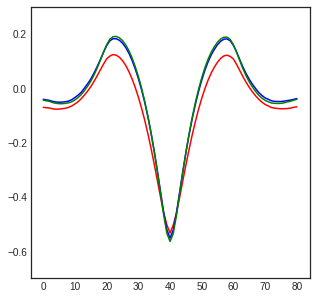

In [38]:
gs = GridSpec(nrows=1, ncols=1)
plt.figure(figsize=(5,5))
color=['r','b','g']
names=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
k=0
for i, cond in enumerate(conditions):
    insulations = pd.read_table(insulation_path[cond])
    insulations.columns=["chrom","start","end","is_bad_bin","log2_insulation_score_200000","n_valid_pixels_200000","boundary_strength_200000","category"]
    if i%3 == 0:
        #print(i)
        ax = plt.subplot(gs[k])
        #ax.set_title(names[k],fontsize=30)
        k=k+1
        print(k)
    img=ax.plot(pile_up(insulations,index_list_dict["FA_DpnII"].values),color=color[i])
    ax.xaxis.tick_bottom()
    ax.set_ylim(-0.7,0.3)
#plt.savefig("ESC_FA_DpnII_strong.pdf")


#conditions = ['FA_DpnII','DSG_DpnII','DSG_MNase']

In [5]:
boundary_list_all=["U54-HFFc6-FA-DpnII_loop_anchors_overlap_strong_boundaries.bed",
"U54-HFFc6-DSG-DpnII_loop_anchors_overlap_strong_boundaries.bed",
"U54-HFFc6-FA-DSG-MNase_loop_anchors_overlap_strong_boundaries.bed"]

  

In [20]:
boundary_list_all=["/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_matrix/insulation_deep/U54-ESC4DN-FA-DpnII_loop_anchors_overlap_strong_boundaries.bed",
                   "/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_matrix/insulation_deep/U54-ESC4DN-DSG-DpnII_loop_anchors_overlap_strong_boundaries.bed",
                   "/nl/umw_job_dekker/users/ba69w/HiC_Analysis/U54_matrix/insulation_deep/U54-H1ESC4DN-FA-DSG-MNase_loop_anchors_overlap_strong_boundaries.bed"]



/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  del sys.path[0]


     0        1        2   3     4        5        6      7         8      9   \
0  chr1  2030000  2060000   1  chr1  2040000  2070000  False -0.076647  397.0   
1  chr1  5490000  5520000   1  chr1  5480000  5510000  False -0.019968  397.0   
2  chr1  6690000  6720000   1  chr1  6680000  6710000  False -1.099495  397.0   
3  chr1  7190000  7240000   3  chr1  7210000  7240000  False -0.238309  397.0   
4  chr1  7630000  7660000   1  chr1  7640000  7670000  False -0.510135  397.0   

         10      11  
0  0.243801  strong  
1  0.543559  strong  
2  1.942034  strong  
3  0.661840  strong  
4  0.444195  strong  


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1530, 8)
(1530, 8)
(1530, 8)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


1


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib

     0        1        2   3     4        5        6      7         8      9   \
0  chr1  1050000  1080000   1  chr1  1060000  1090000  False  0.411661  397.0   
1  chr1  2180000  2205000   1  chr1  2160000  2190000  False -0.117359  397.0   
2  chr1  2370000  2395000   1  chr1  2390000  2420000  False -0.370780  397.0   
3  chr1  2400000  2425000   1  chr1  2390000  2420000  False -0.370780  397.0   
4  chr1  3055000  3080000   2  chr1  3050000  3080000  False -0.439192  397.0   

         10      11  
0  0.438110  strong  
1  0.397329  strong  
2  0.970443  strong  
3  0.970443  strong  
4  1.220610  strong  


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(3550, 8)
(3550, 8)
(3550, 8)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


1


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.
/home/ba69w/tools/miniconda3/envs/cooler-env/lib

     0        1        2   3     4        5        6      7         8      9   \
0  chr1   970000   995000   2  chr1   960000   990000  False  0.320106  297.0   
1  chr1  1280000  1305000   3  chr1  1290000  1320000  False -0.253965  397.0   
2  chr1  1895000  1920000   1  chr1  1900000  1930000  False -0.273058  397.0   
3  chr1  2160000  2185000   1  chr1  2160000  2190000  False -0.127803  397.0   
4  chr1  2180000  2210000   3  chr1  2160000  2190000  False -0.127803  397.0   

         10      11  
0  0.543761  strong  
1  0.778906  strong  
2  0.795110  strong  
3  0.417214  strong  
4  0.417214  strong  


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4440, 8)
(4440, 8)
(4440, 8)


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


1


/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/ba69w/tools/miniconda3/envs/cooler-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


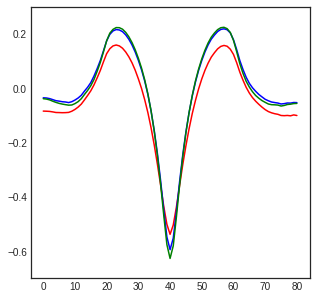

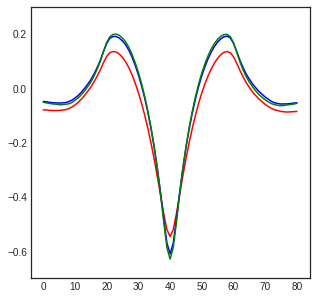

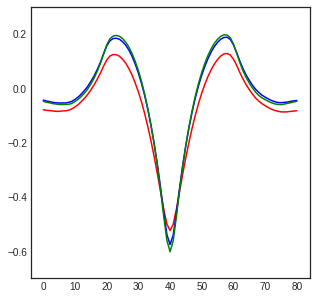

In [21]:
s=0
for  boundary_list in boundary_list_all:
    boundary_names=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
    boundary_list = pd.read_table(boundary_list,header=None)
    print(boundary_list.head(5))
    boundary_list=boundary_list.iloc[:,[4,5,6]]
    boundary_list=boundary_list.drop_duplicates()
    boundary_list.columns=["chrom","start","end"]
    mid_point=np.mean(boundary_list[["start","end"]],axis=1)
    index_list_dict={}
    for cond in conditions:
        insulations_new_all=pd.DataFrame()
        insulations = pd.read_table(insulation_path[cond])
        insulations.columns=["chrom","start","end","is_bad_bin","log2_insulation_score_200000","n_valid_pixels_200000","boundary_strength_200000","category"]
        for chrom in np.unique(insulations[["chrom"]]):
            insulations_new_chr=pd.DataFrame()
            boundary_list_chr=boundary_list[boundary_list["chrom"]==chrom]
            mid_point_new=boundary_list_chr[["start","end"]].mean(axis=1)+1
            #mid_point_new=[int(i) for i in mid_point_new]
            #print(mid_point_new[1:6])
            insulations_chr=insulations[insulations["chrom"]==chrom]
            insulations_chr["start"] = pd.to_numeric(insulations_chr["start"])
            insulations_chr["end"] = pd.to_numeric(insulations_chr["end"])
            #print(insulations_chr)
            for i in mid_point_new:
                #print(i)
                temp=insulations_chr[insulations_chr.eval('(start < {}) & ({} < end)'.format(i,i))]
                insulations_new_chr=pd.concat([insulations_new_chr,pd.DataFrame(temp)],ignore_index=False)
            insulations_new_all=pd.concat([insulations_new_all,insulations_new_chr])
        print(insulations_new_all.shape)
        index_list_dict[cond]=insulations_new_all.index
    gs = GridSpec(nrows=1, ncols=1)
    plt.figure(figsize=(5,5))
    color=['r','b','g']
    names=["FA-DpnII","FA+DSG-DpnII","FA+DSG-MNase"]
    k=0
    for i, cond in enumerate(conditions):
        insulations = pd.read_table(insulation_path[cond])
        insulations.columns=["chrom","start","end","is_bad_bin","log2_insulation_score_200000","n_valid_pixels_200000","boundary_strength_200000","category"]
        if i%3 == 0:
            #print(i)
            ax = plt.subplot(gs[k])
            #ax.set_title(names[k],fontsize=30)
            k=k+1
            print(k)
        img=ax.plot(pile_up(insulations,index_list_dict[cond].values),color=color[i])
        ax.xaxis.tick_bottom()
        ax.set_ylim(-0.7,0.3)
        ax.set_xlim()
    plt.savefig("ESC_"+boundary_names[s]+"_loop_anchors_overlap_boundries.pdf")
    s=s+1



